<a href="https://colab.research.google.com/github/cuadrellin/practices/blob/main/Visualizaci%C3%B3n_de_Datos_con_MatplotLib_y_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Cargo los datos
data = sns.load_dataset("iris")
data, set(data["species"])

(     sepal_length  sepal_width  petal_length  petal_width    species
 0             5.1          3.5           1.4          0.2     setosa
 1             4.9          3.0           1.4          0.2     setosa
 2             4.7          3.2           1.3          0.2     setosa
 3             4.6          3.1           1.5          0.2     setosa
 4             5.0          3.6           1.4          0.2     setosa
 ..            ...          ...           ...          ...        ...
 145           6.7          3.0           5.2          2.3  virginica
 146           6.3          2.5           5.0          1.9  virginica
 147           6.5          3.0           5.2          2.0  virginica
 148           6.2          3.4           5.4          2.3  virginica
 149           5.9          3.0           5.1          1.8  virginica
 
 [150 rows x 5 columns],
 {'setosa', 'versicolor', 'virginica'})

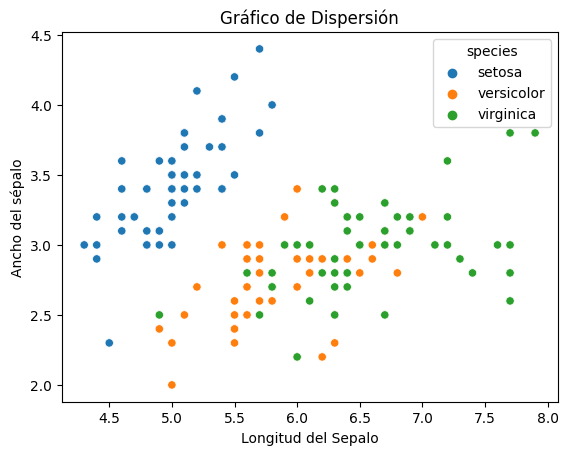

In [8]:
#Gráfico de dispersion cargando datos de la libreria
sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data)
plt.xlabel("Longitud del Sepalo")
plt.ylabel("Ancho del sépalo")
plt.title("Gráfico de Dispersión")
plt.show()

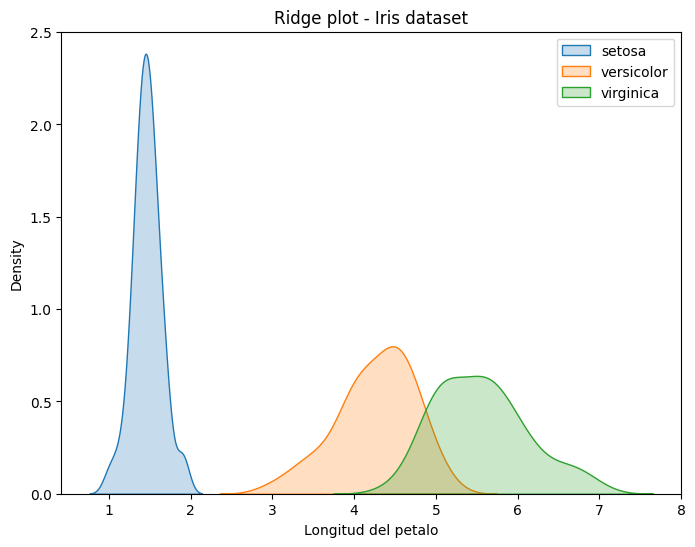

In [11]:
#Generar una gráfica de Ridgeplot
#Permite observar las distribuciones de diferentes medidas

setosa = data[data["species"] == "setosa"]
versicolor = data[data["species"] == "versicolor"]
virginica = data[data["species"] == "virginica"]

#Configuramos la figura y los ejes
fig, ax = plt.subplots(figsize=(8,6))
plt.xlabel("Longitud del petalo")

#Crear el ridge plot usando la funcion kdeplot
sns.kdeplot(data=setosa["petal_length"], label="setosa", ax =ax, fill=True)
sns.kdeplot(data=versicolor["petal_length"], label="versicolor", ax =ax, fill=True)
sns.kdeplot(data=virginica["petal_length"], label="virginica", ax =ax, fill=True)

#Ajustamos la posicion de las leyendas
ax.legend(loc="upper right")

plt.title("Ridge plot - Iris dataset")
plt.show()

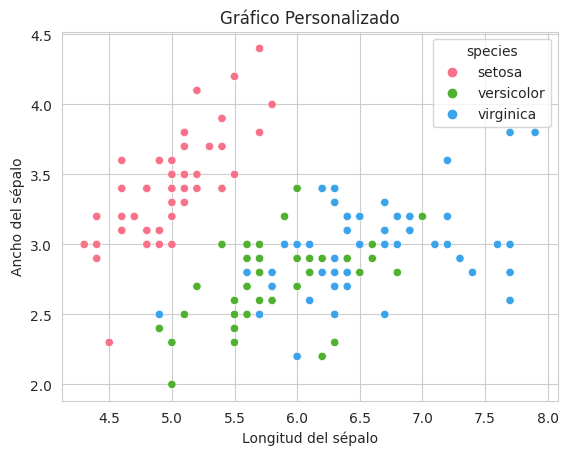

In [12]:
#gráfica de dispersión personalizando seaborn
sns.set_style("whitegrid")
palette = sns.color_palette("husl", 3)

sns.scatterplot(x="sepal_length", y="sepal_width", hue="species", data=data, palette=palette)
plt.xlabel("Longitud del sépalo")
plt.ylabel("Ancho del sépalo")
plt.title("Gráfico Personalizado")
plt.show()

#Mostrara un gráfico de dispersion como el de mas arriba pero mejorado esteticamente

Ejemplo avanzado de graficación. Visualizar la relación entre dos características en un conjunto de datos, así como la distribución de cada característica.  Utilizaremos un gráfico de dispersión e histogramas para cada variable.

In [14]:
#Generar los datos de ejemplo
np.random.seed(42)
edad_autos = np.random.randint(0, 20, size=200)
precio_autos = 30 - edad_autos + np.random.normal(-3, 3, size=200)
data = pd.DataFrame({
    "edad":edad_autos,
    "precio":precio_autos
})
data


,edad,precio
0,6,23.662535
1,19,9.816449
2,14,10.839106
3,10,16.190199
4,7,19.569613
...,...,...
195,15,12.807953
196,2,30.441000
197,19,9.213749
198,3,24.270218


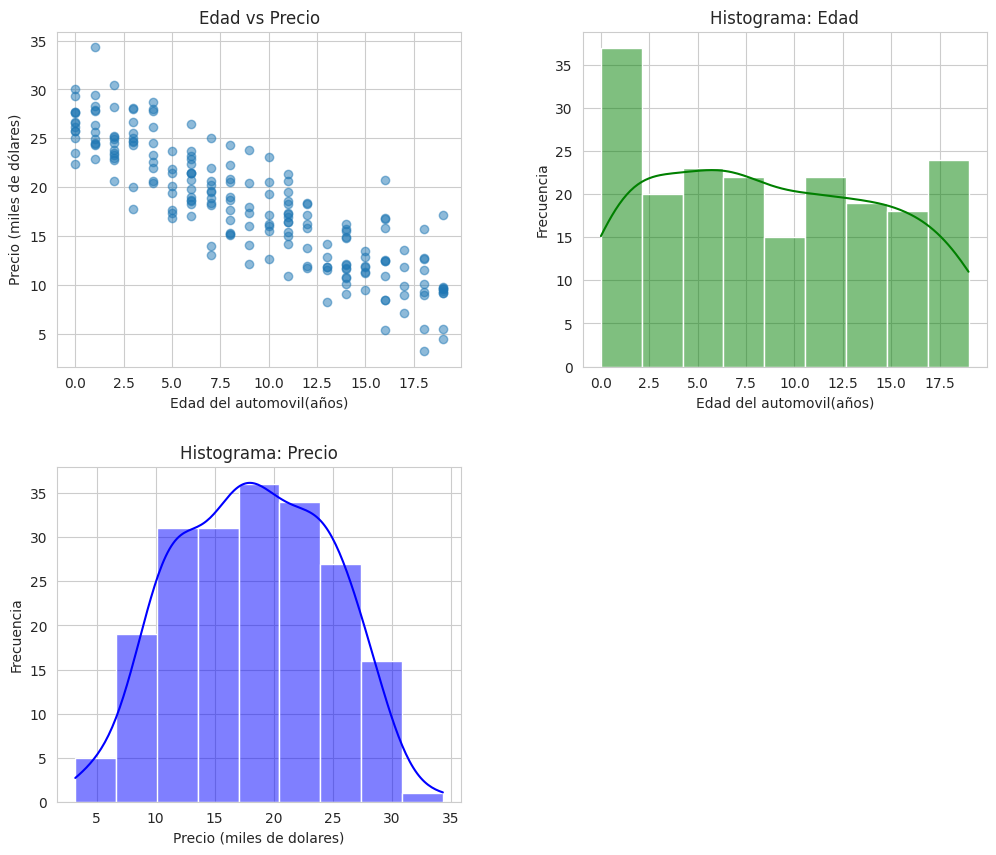

In [21]:
#Creacion del lienzo
fig, ax = plt.subplots(2,2, figsize=(12,10))

#Grafico de dispersion de la edad de los autos
ax[0,0].scatter(data["edad"], data["precio"], alpha=0.5)
ax[0,0].set_xlabel("Edad del automovil(años)")
ax[0,0].set_ylabel("Precio (miles de dólares)")
ax[0,0].set_title("Edad vs Precio")

#Histograma de la edad
sns.histplot(data["edad"], ax=ax[0,1], kde=True, color="g")  #kde es la aproximacion
ax[0,1].set_xlabel("Edad del automovil(años)")
ax[0,1].set_ylabel("Frecuencia")
ax[0,1].set_title("Histograma: Edad")

#Histograma del Precio
sns.histplot(data["precio"], ax=ax[1,0], kde=True, color="b")
ax[1,0].set_xlabel("Precio (miles de dolares)")
ax[1,0].set_ylabel("Frecuencia")
ax[1,0].set_title("Histograma: Precio")

#Eliminar cuarto subplot
ax[1,1].axis("off")

#Ajustamos los anchos de las graficas
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.show()


Análisis de Datos Exploratorio

In [22]:
sns.set(style="darkgrid")

#Importamos el dataset
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Identificar la variable que queremos predecir o encontrar relaciones entre variables

In [23]:
#Obtenemos informacion básica del conjunto de datos
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [25]:
df.describe()   #info de las columnas numéricas

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Análisis Univariado

[]

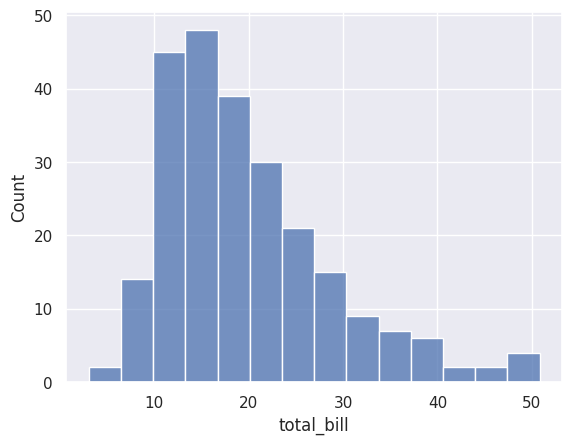

In [26]:
sns.histplot(data=df, x="total_bill")
plt.plot()

[]

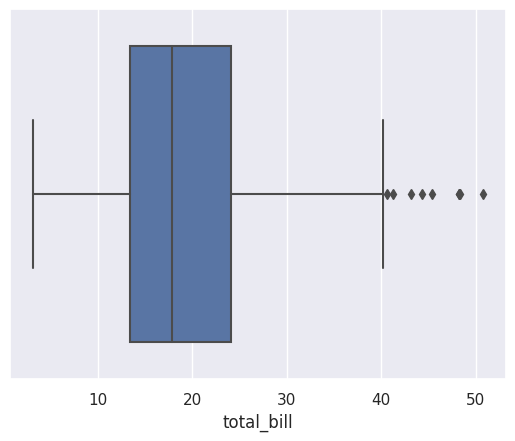

In [28]:
#Visualizaremos el mismo gráfico de otra forma
sns.boxplot(data=df, x="total_bill")
plt.plot()

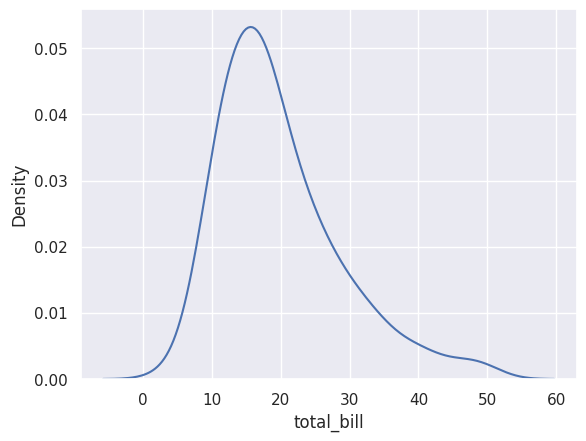

In [29]:
sns.kdeplot(data=df, x="total_bill")  #gráfico de densidad
plt.show()

Análisis Bivariado

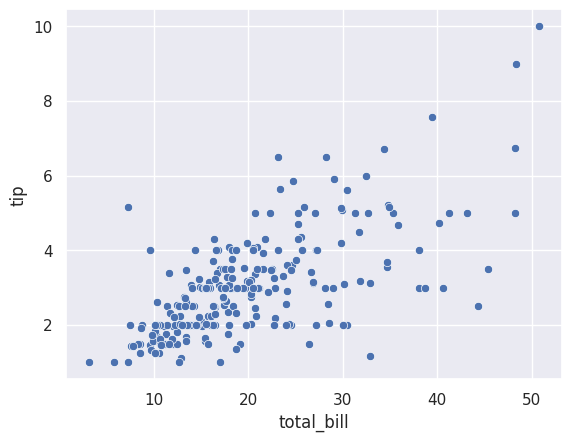

In [30]:
sns.scatterplot(data=df, x="total_bill", y="tip")
plt.show()

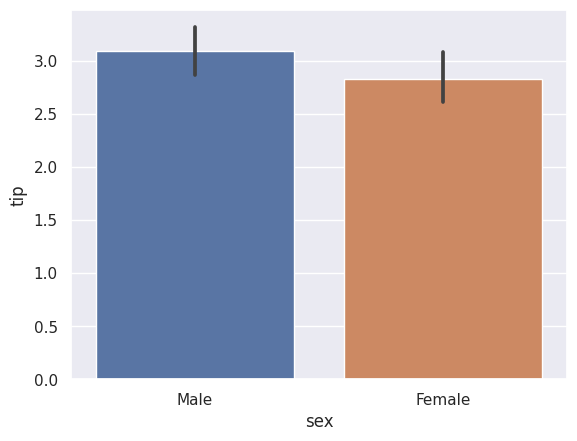

In [32]:
sns.barplot(data=df, x="sex", y="tip")
plt.show()

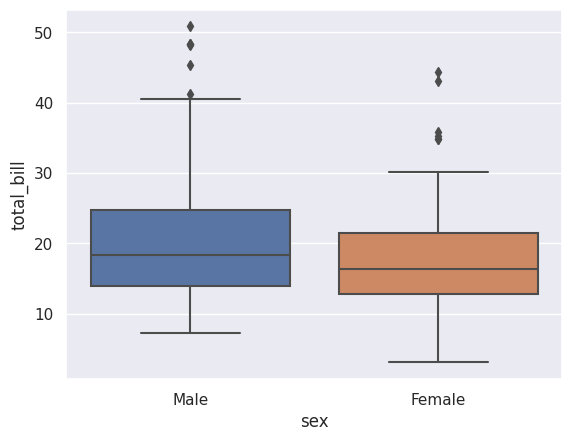

In [33]:
#Generaremos un boxplot que grafique el sexo respecto al total de la cuenta
sns.boxplot(data=df, x="sex", y="total_bill")
plt.show()

Análisis Multivariado

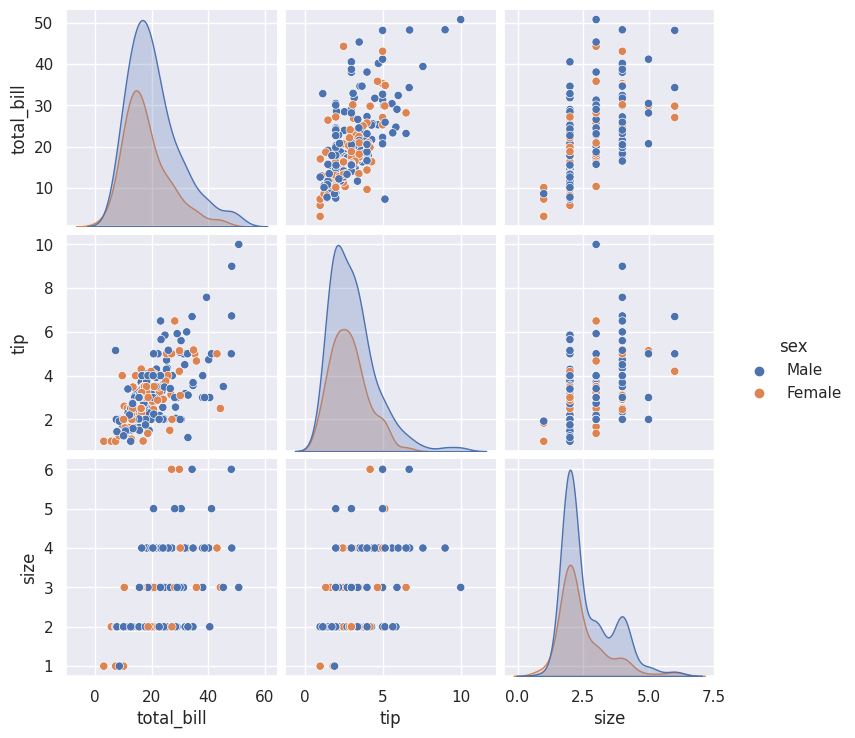

In [34]:
sns.pairplot(df, hue="sex")
plt.show()

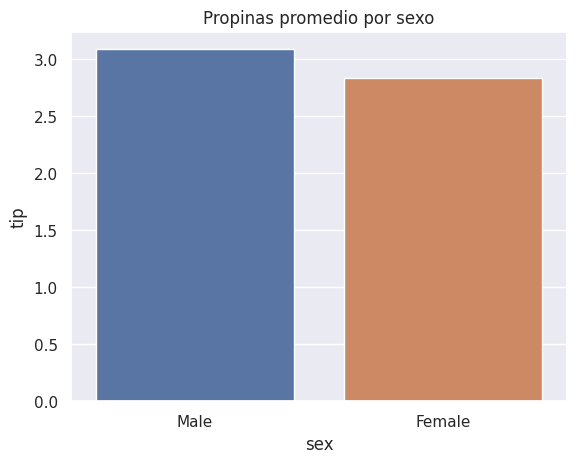

In [36]:
#Grafico de Barras de Propinas promedio por sexo
sns.barplot(data=df, x="sex", y="tip", errorbar=None)
plt.title("Propinas promedio por sexo")
plt.show()

#Hombres en promedio pagan más propina (sin prueba de H0)

¿La propina que se paga cada día es la misma sin importar qué día de la semana es?


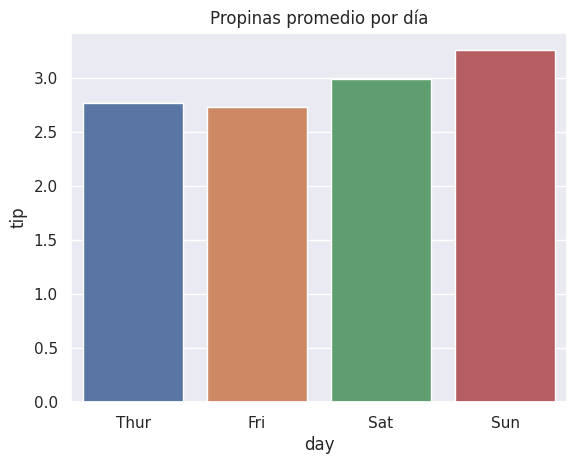

In [37]:
sns.barplot(data=df, x="day", y="tip", errorbar = None)
plt.title("Propinas promedio por día")
plt.show()
#Los domingos se paga más propina

Text(0.5, 1.0, 'Propinas promedio por tiempo')

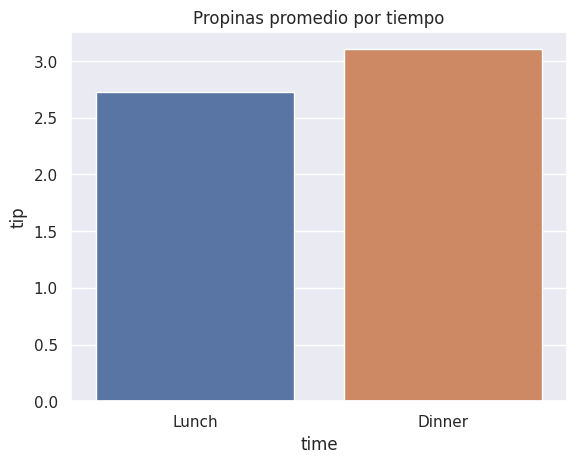

In [38]:
sns.barplot(data=df, x="time", y="tip", errorbar=None)
plt.title("Propinas promedio por tiempo")
plt.show()
#En promedio, en la cena se paga más propina

[]

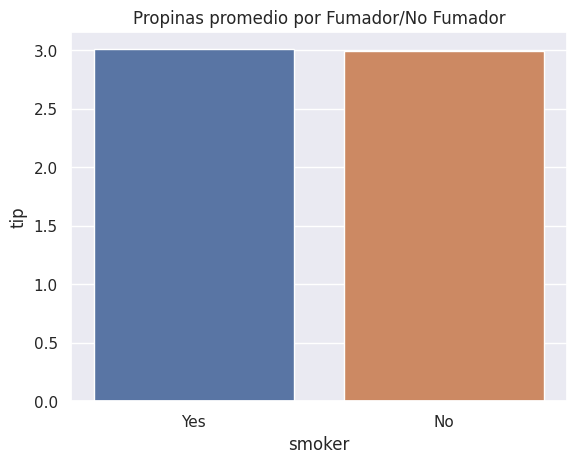

In [39]:
#Propinas promedio por fumador
sns.barplot(data = df, x="smoker", y="tip", errorbar=None)
plt.title("Propinas promedio por Fumador/No Fumador")
plt.plot()
#Que el cliente sea o no fumador no afeta al monto de la propina que deja

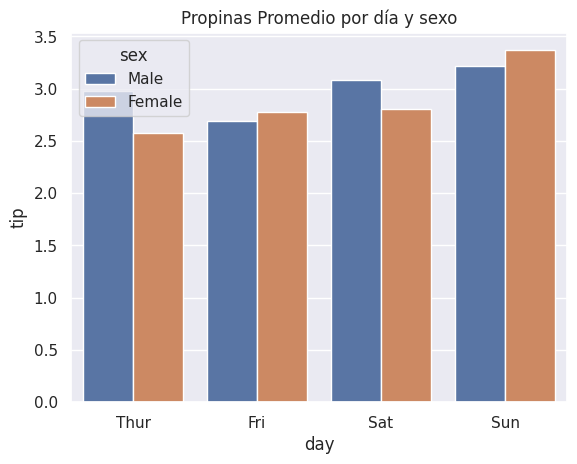

In [40]:
#Grafico de barras de propinas promedio por día y sexo
sns.barplot(data=df, x="day", y="tip", hue="sex", errorbar=None)
plt.title("Propinas Promedio por día y sexo")
plt.show()

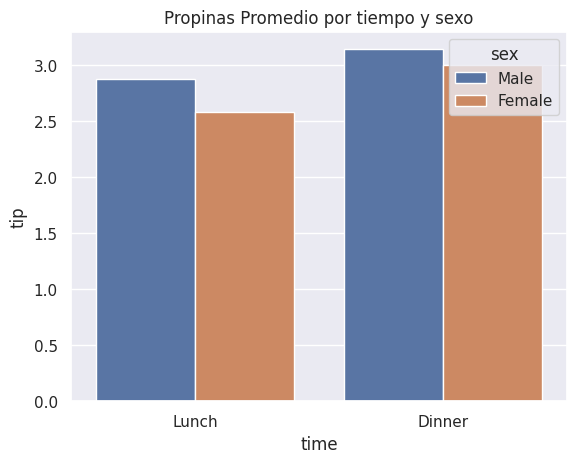

In [41]:
#Grafico de Barras de Propinas promedio por tiempo y sexo
sns.barplot(data=df, x="time", y="tip", hue="sex", errorbar=None)
plt.title("Propinas Promedio por tiempo y sexo")
plt.show()

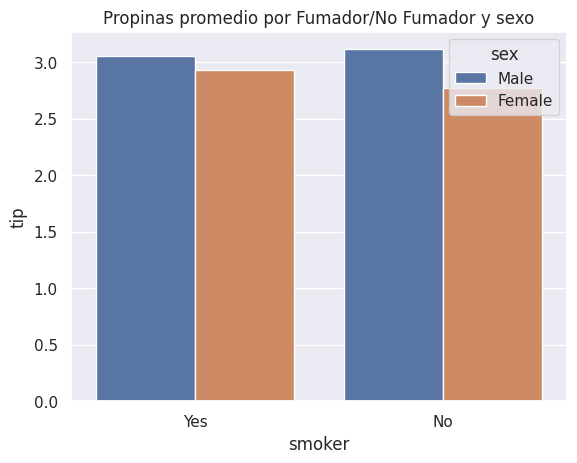

In [42]:
#Grafico de Barras de propinas promedio por fumador y Sexo
sns.barplot(data=df, x="smoker", y="tip", hue="sex", errorbar=None)
plt.title("Propinas promedio por Fumador/No Fumador y sexo")
plt.show()

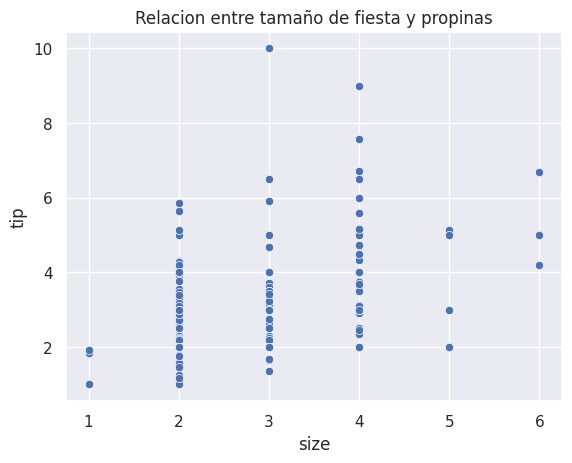

In [43]:
#Grafico de dispersion entre size y tip
sns.scatterplot(data=df, x="size", y="tip")
plt.title("Relacion entre tamaño de fiesta y propinas")
plt.show()

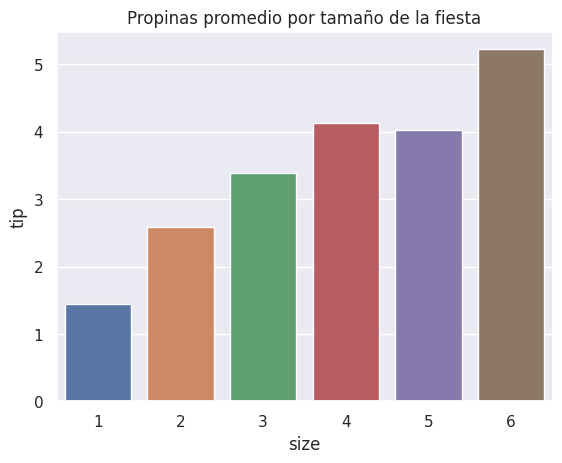

In [46]:
#Grafico de Barras de propinas promedio por tamaño de la fiesta
sns.barplot(data=df, x="size", y="tip", errorbar=None)
plt.title("Propinas promedio por tamaño de la fiesta")
plt.show()

In [47]:
#Calculo del porcentaje de propina y lo agrego al dataFrame
df["tip_percentage"] =(df["tip"] / df["total_bill"]) * 100
df

,total_bill,tip,sex,smoker,day,time,size,tip_percentage
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


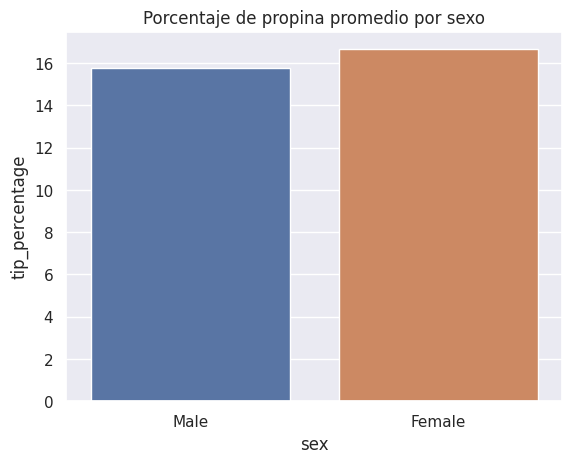

In [48]:
#Grafico de barras de porcentaje de propina promedio por sexo
sns.barplot(data=df, x="sex", y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por sexo")
plt.show()

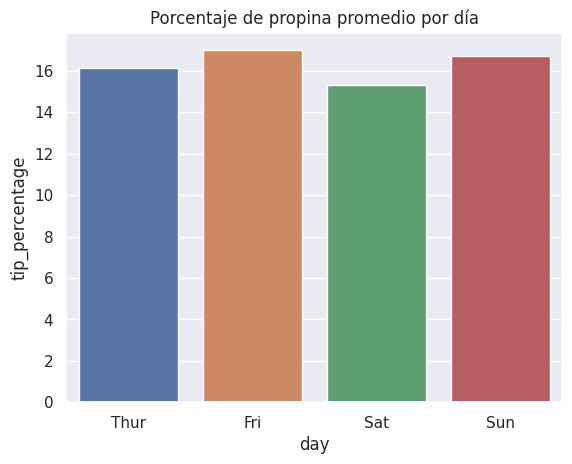

In [49]:
#Grafico de porcentaje de propina promedio por día
sns.barplot(data=df, x="day", y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por día")
plt.show()

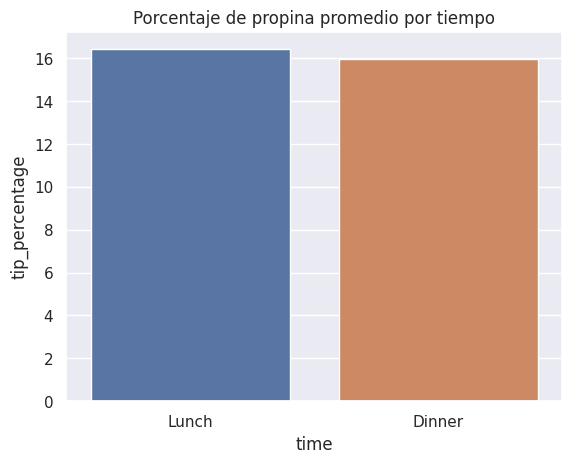

In [51]:
#Grafico de porcentaje de propina promedio por tiempo
sns.barplot(data=df, x="time", y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por tiempo")
plt.show()

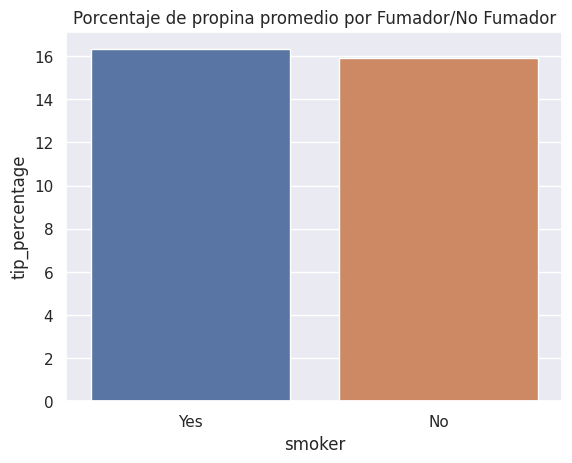

In [52]:
#Gráfico de porcentaje de propina promedio por Fumador/No Fumador
sns.barplot(data=df, x="smoker", y="tip_percentage", errorbar=None)
plt.title("Porcentaje de propina promedio por Fumador/No Fumador")
plt.show()